In [1]:
#Importing required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Fish.csv')
fish = data.copy()
fish.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
45,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
120,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
64,Parkki,120.0,17.5,19.0,21.3,8.3922,2.9181
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476


In [3]:
fish.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
fish.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
sp = fish['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


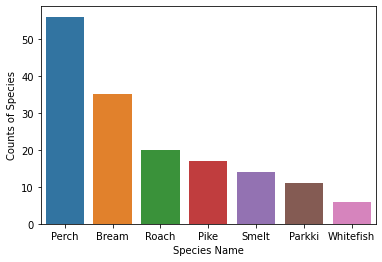

In [6]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species Name')
plt.ylabel('Counts of Species')
plt.show()

In [7]:
fish.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


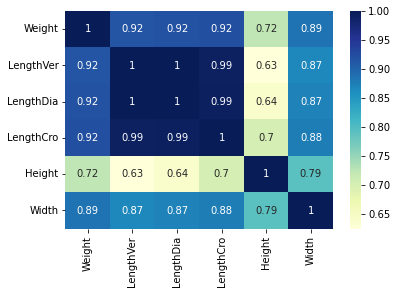

In [8]:
sns.heatmap(fish.corr(), annot=True, cmap='YlGnBu');

In [9]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [10]:
df1 = fish.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [11]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]

**Dividing Dataset into Train and Test Datasets**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print('Nu,ber of samples we have in our test and train datasets.')
print('X_train:- ', np.shape(X_train))
print('y_train:- ', np.shape(y_train))
print('X_test:- ', np.shape(X_test))
print('y_test:- ', np.shape(y_test))

Nu,ber of samples we have in our test and train datasets.
X_train:-  (124, 5)
y_train:-  (124,)
X_test:-  (32, 5)
y_test:-  (32,)


In [14]:
L_R = LinearRegression()
L_R.fit(X_train,y_train)

LinearRegression()

**My Model's Linear Regression Formula:**

In [15]:
# My model's parameters:
print('Model intercept:- ', L_R.intercept_)
print('Model coefficients:- ', L_R.coef_)

Model intercept:-  -441.00887253881797
Model coefficients:-  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [16]:
print('y = ' + str('%.2f' % L_R.intercept_) + ' + ' + str('%.2f' % L_R.coef_[0]) + '*X1 ' + str('%.2f' % L_R.coef_[1]) + '*X2 ' +
      str('%.2f' % L_R.coef_[2]) + '*X3 + ' + str('%.2f' % L_R.coef_[3]) + '*X4 + ' + str('%.2f' % L_R.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


## **`PREDICTION`**

In [17]:
y_head = L_R.predict(X_train)

In [26]:
r2_score(y_train, y_head)

0.9116039087262157

In [27]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
import pickle
pickle.dump(L_R, open('pre.pkl','wb'))


#Loading model to compare the results
model = pickle.load(open('pre.pkl','rb'))
result= L_R.score(X_test,y_test)
